<a href="https://colab.research.google.com/github/Gustavo-Martinez-Gutierrez/Gustavo_portfolio/blob/main/0_An%C3%A1lisis_de_Datos_Aplicados_a_la_Gesti%C3%B3n_ML_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

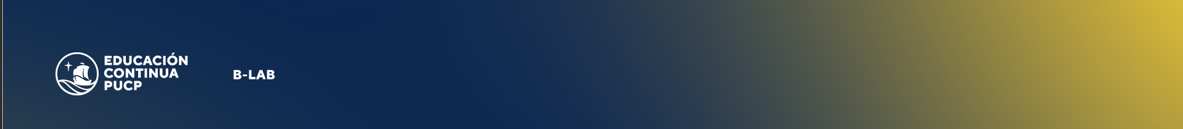

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

# 1. Análisis de Clusters

## 1.1 Ejemplo: Cluster jerárquico

In [ ]:
# Creamos datos al azar:
X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,30],
              [85,70],
              [71,80],
              [60,78],
              [70,55],
              [80,91]])

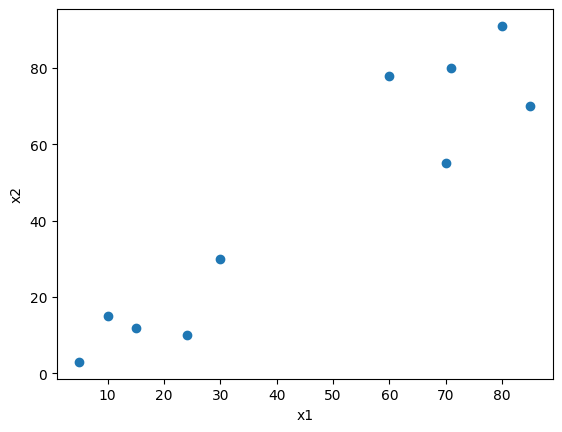

In [ ]:
# Graficamos los puntos en un diagrama de dispersión:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Para construir el cluster, primero comenzamos con elegir el método de similaridad con los que compararemos cada observación. En este caso, usaremos el método de Ward. El algoritmo utiliza esta distancia para definir qué clusters se fusionan, eligiendo aquellos que minimizan la distancia. Esto se realiza de forma iterativa hasta que todos los puntos estén en un solo cluster o se añada otro criterio de parada. Intuitivamente, se quiere que todos los clusters tengan la mínima varianza posible dentro de ellos.

Este método sirve para comparar la distancia entre clusters, de la siguiente forma. Si $C_i$ es un cluster y $p$ un punto dentro del cluster, la distancia de Ward entre un cluster $C_i$ y otro $C_j$ se calcula como la varianza de $C_i$ y $C_j$ menos la varianza de los clusters fusionados, dividida por el total de elementos en los clusters:
\begin{align}
  d_{\text{Ward}}(C_i,C_j)=\frac{\text{Var}(C_i)+\text{Var}(C_j)-\text{Var}(C_i\cup C_j)}{|C_i\cup C_j|}
\end{align}

In [ ]:
# Elegimos el método de similaridad
linkage_matrix = linkage(X, 'ward')

Existen otros métodos de distancia. A continuación detallamos algunos de ellos.

Enlace simple (single linkage): En este método, la distancia entre dos clusters se define como la distancia más corta entre cualquier punto de un cluster y cualquier punto del otro cluster.

Enlace completo (complete linkage): En este método, la distancia entre dos clusters se define como la distancia más larga entre cualquier punto de un cluster y cualquier punto del otro cluster.

Enlace promedio (average linkage): En este método, la distancia entre dos clusters se define como la media de todas las distancias entre pares de puntos, uno de cada cluster.

### Dendrograma

Un dendrograma es un árbol que muestra cómo se agrupan los elementos a medida que se van fusionando en clusters más grandes.

La altura en el dendrograma representa qué tan diferentes son los clusters o los grupos en cada paso del proceso de agrupamiento. Mientras más bajo esté un punto de unión en el dendrograma, más similares son los clusters que se están fusionando en ese punto.

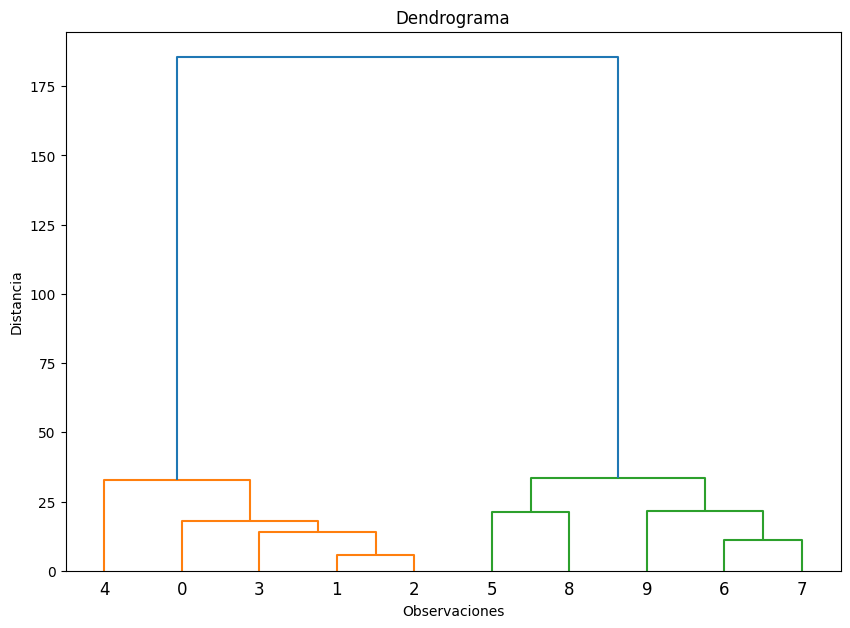

In [ ]:
# Creamos el dendrograma:

plt.figure(figsize=(10, 7))

dendrogram(linkage_matrix) #, labels=[f"Obs {i+1}" for i in range(len(X))])

plt.title("Dendrograma")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()

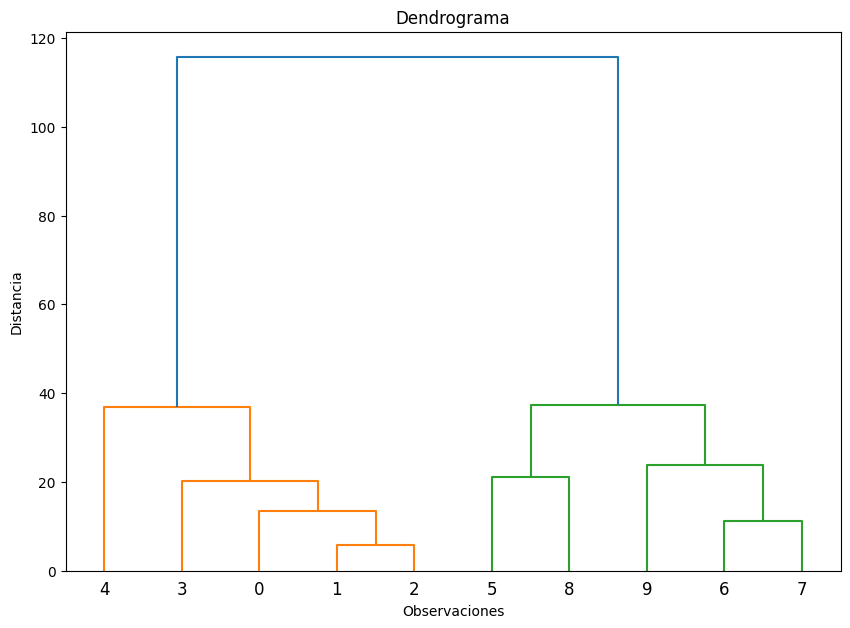

In [ ]:
# Elegimos el método de similaridad
linkage_matrix = linkage(X, 'complete')

# Creamos el dendrograma:

plt.figure(figsize=(10, 7))

dendrogram(linkage_matrix) #, labels=[f"Obs {i+1}" for i in range(len(X))])

plt.title("Dendrograma")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()

In [ ]:
# Definimos como punto de corte una distancia de 50 para definir los clusters:

from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linkage_matrix, 80, criterion='distance')
print(clusters)

[1 1 1 1 1 2 2 2 2 2]


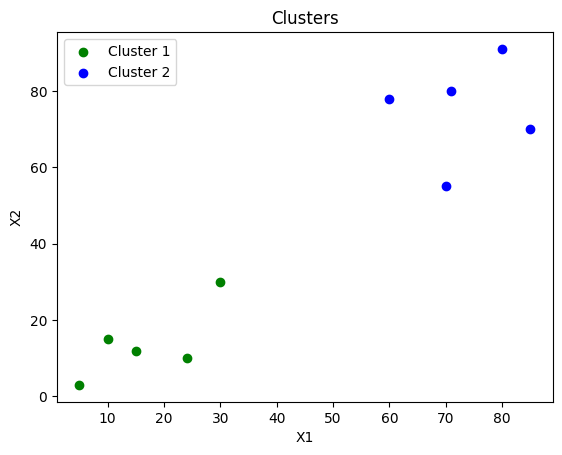

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

for cluster_id in np.unique(clusters):
    plt.scatter(X[clusters == cluster_id, 0], X[clusters == cluster_id, 1], c=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id}')

plt.legend(loc='best')
plt.title("Clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## 1.2 Ejemplo: Cluster de k-medias

Para este ejemplo utilizamos la misma información que en el anterior.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Elegimos k=2 para el cluster de k medias
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0).fit(X)
labels = kmeans.labels_

In [ ]:
print(labels)

[1 1 1 1 1 0 0 0 0 0]


El método del codo es una técnica utilizada para determinar el número óptimo de grupos en un conjunto de datos. Implica trazar el número de grupos frente a los valores correspondientes de WCSS (Within-Cluster Sum of Squares, que es la suma de las distancias al cuadrado entre cada punto y el centroide del cluster al que prertenece). El punto "codo" en la gráfica, donde la tasa de disminución en WCSS comienza a desacelerarse, indica el número óptimo de grupos. Más allá de este punto, agregar más grupos puede que no reduzca significativamente el WCSS, lo que sugiere que los grupos adicionales podrían no agregar mucho valor en términos de explicar la variación en los datos.

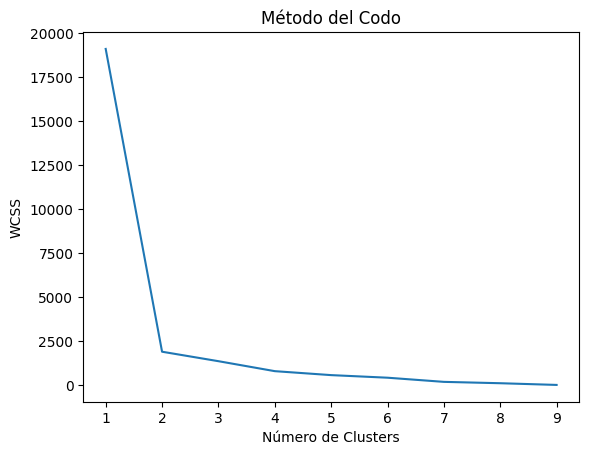

In [ ]:
# Elección del cluster con el método del codo:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Elegimos k=2 para el cluster de k medias
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0).fit(X)
labels = kmeans.labels_

# Mostramos los clusters asignados para k=2
print("Cluster assignments for k=2:", labels)


Cluster assignments for k=2: [1 1 1 1 1 0 0 0 0 0]


## 1.3 Caso 1: Segmentación

En este caso utilizaremos la base de datos de plataforma online con la que hemos venido trabajando. Queremos saber si, de todas las transacciones recogidas, es posible identificar grupos de clientes. En primer lugar, procedemos a cargar la información.  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = '/content/drive/MyDrive/online_platform.csv'
data_clean = pd.read_csv(ruta)

### Cluster jerárquico

Como esta es una matriz de más de 2 dimensiones, no podemos tener una representación gráfica como un diagrama de dispersión, pero si podemos tener un dendrograma en el caso de un cluster jerárquico.
En una primera etapa, vamos a seleccionar algunas variables de interés para ver si es posible tener algún tipo de categorización en conglomerados.

In [ ]:
data_clean.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [ ]:
df_clean = data_clean.drop(['Unnamed: 0', 'CustomerID', 'Date'], axis=1)
df_clean.head()

,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0
1,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0
2,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,4500.0,2424.5,1,ELEC10,10.0
3,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,4500.0,2424.5,1,ELEC10,10.0
4,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,4500.0,2424.5,1,ELEC10,10.0


Dado que calcular un cluster con un número elevado de observaciones puede requerir mucha memoria, vamos a trabajar con una submuestra de 1000 observaciones. También tenemos que asegurarnos que la muestra contenga valores finitos o no missing.

In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Codificando las variables de tipo objeto
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [ ]:
data_cluster = data_clean[['Avg_Price','Quantity','Online_Spend','Tenure_Months']]
sample = data_cluster.sample(n=50, random_state=42).dropna()

In [ ]:
sample.describe()

,Avg_Price,Quantity,Online_Spend,Tenure_Months
count,50.000000,50.000000,50.000000,50.000000
mean,59.555600,2.160000,1819.187600,29.260000
std,61.921344,3.513008,923.162171,13.663313
min,1.990000,1.000000,515.440000,5.000000
25%,10.450000,1.000000,1153.472500,19.000000
50%,21.990000,1.000000,1674.730000,32.000000
75%,119.000000,1.000000,2270.490000,39.750000
max,199.000000,20.000000,4556.930000,50.000000


In [ ]:
# Elegimos el método de similaridad
linkage_matrix = linkage(sample)

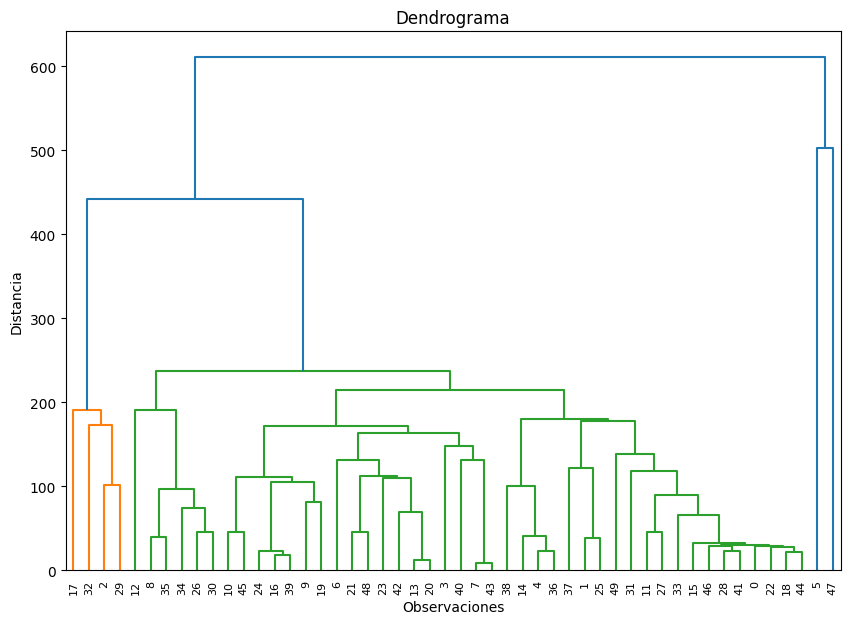

In [ ]:
# Creamos el dendrograma:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix) #, labels=[f"Obs {i+1}" for i in range(len(sample))])
plt.title("Dendrograma")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()

In [ ]:
clusters = fcluster(linkage_matrix, 200, criterion='distance')
print(clusters)

[4 4 1 3 4 5 3 3 2 3 3 4 2 3 4 4 3 1 4 3 3 3 4 3 3 4 2 4 4 1 2 4 1 4 2 2 4
 4 4 3 3 4 3 3 4 3 4 6 3 4]


### Cluster k-medias

A diferencia de un cluster jerárquico, un cluster k-medias es más recomendable cuando se cuenta con un volumen grande de información. También es más eficiente desde el punto de vista computacional. Para poder

In [ ]:
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0).fit(data_cluster.dropna())
labels = kmeans.labels_

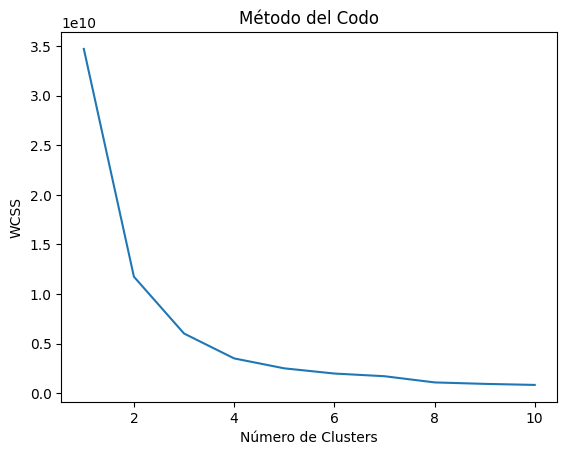

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0).fit(data_cluster.dropna())
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

En este caso, el número de clusters debería estar entre 2 y 4. Supongamos que es igual a 3.

In [ ]:
data_cluster = data_cluster.dropna()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0).fit(data_cluster)
labels = kmeans.labels_

In [ ]:
print(labels)

[1 1 1 ... 1 1 1]


¿Entonces cómo caracterizamos a los clusters? En principio cada una de las observaciones está asignada a un cluster, por lo tanto, podemos analizar los estadísticos descriptivos de cada una de las varaibles que forman los clusters para cada uno de los grupos creados.

In [ ]:
# En primer lugar, añadimos una etiqueta al dataframe original con las etiquetas de cada cluster:
data_cluster['labels'] = labels

# Finalmente calculamos estadísticos descriptivos para cada variable del cluster:
grouped = data_cluster.groupby('labels')
for name, group in grouped:
    print(f"Cluster {name}:\n{group.describe()}\n")

Cluster 0:
         Avg_Price     Quantity  Online_Spend  Tenure_Months  labels
count  9521.000000  9521.000000   9521.000000    9521.000000  9521.0
mean     64.808857     4.661905   3140.276474      26.491860     0.0
std      73.119050    22.222780    448.545575      13.698263     0.0
min       0.400000     1.000000   2617.140000       2.000000     0.0
25%       8.790000     1.000000   2805.790000      15.000000     0.0
50%      20.620000     1.000000   2973.530000      28.000000     0.0
75%     119.000000     2.000000   3434.310000      38.000000     0.0
max     355.740000   825.000000   4556.930000      50.000000     0.0

Cluster 1:
          Avg_Price      Quantity  Online_Spend  Tenure_Months   labels
count  23964.000000  23964.000000  23964.000000   23964.000000  23964.0
mean      49.366687      4.657528   2065.610546      26.286597      1.0
std       61.711952     21.240619    301.253315      13.174086      0.0
min        0.390000      1.000000   1576.380000       2.000000      

# 2. Componentes Principales

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

La base de datos Iris es un conjunto de datos muy utilizado en ML. Contiene información sobre las características físicas de flores Iris de tres especies diferentes: Iris setosa, Iris virginica e Iris versicolor.

Características:
- Sepal_Length: Longitud del sépalo (en cm)
- Sepal_Width: Ancho del sépalo (en cm)
- Petal_Length: Longitud del pétalo (en cm)
- Petal_Width: Ancho del pétalo (en cm)
- Species: Especie de Iris (setosa, virginica, versicolor)

In [ ]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data  # Atributos
y = iris.target  # Target

# Normalizar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir la dimensionalidad a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame para visualizar los datos
df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df['Target'] = y

In [ ]:
X_pca

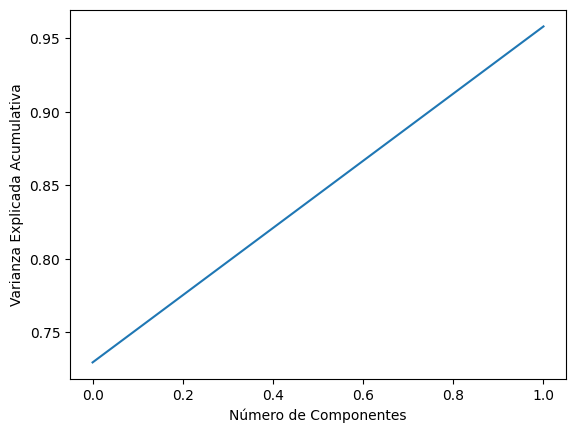

In [ ]:
# Graficar la varianza explicada acumulativa
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()

In [ ]:
df

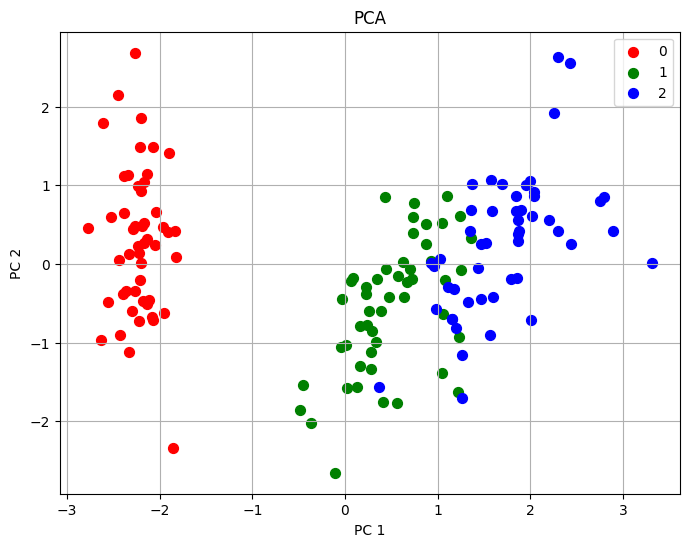

In [ ]:
# Graficar los datos en el nuevo espacio de características reducido por PCA
plt.figure(figsize=(8, 6))
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = df['Target'] == target
    plt.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], c=color, s=50, label=target)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')
plt.legend(targets)
# plt.grid()
plt.show()

Un segundo ejemplo a partir de una base que ya se ha utilizado anteriormente:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = '/content/drive/MyDrive/sales_clean.csv'
df = pd.read_csv(ruta)

In [ ]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
df_filtered = df.query("Store==1 and Dept==20")

In [ ]:
df_filtered.corr()

<ipython-input-34-3b1745aa73cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filtered.corr()


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,PC1,PC2
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,NaN,NaN,1.000000,0.056896,0.249007,0.043472,0.222497,-0.051698,0.173680,0.179354,-0.187809,0.104756,-0.071126,NaN,8.325840e-02,-2.932657e-02
IsHoliday,NaN,NaN,0.056896,1.000000,-0.200543,-0.085903,-0.078720,0.426252,0.484969,-0.017194,-0.115828,-0.028919,0.082949,NaN,-7.197850e-02,-1.151802e-02
Temperature,NaN,NaN,0.249007,-0.200543,1.000000,0.228493,0.128972,-0.467411,-0.087130,0.025732,-0.292917,0.118503,-0.180695,NaN,1.936482e-01,6.474258e-02
Fuel_Price,NaN,NaN,0.043472,-0.085903,0.228493,1.000000,0.092808,-0.301010,-0.179147,0.011074,-0.235280,0.755259,-0.513944,NaN,8.419510e-01,5.241606e-01
MarkDown1,NaN,NaN,0.222497,-0.078720,0.128972,0.092808,1.000000,-0.015583,-0.171263,0.770225,0.104151,0.023637,-0.066306,NaN,7.363922e-02,-8.508612e-03
MarkDown2,NaN,NaN,-0.051698,0.426252,-0.467411,-0.301010,-0.015583,1.000000,-0.056176,-0.034380,0.039414,-0.310920,0.315449,NaN,-3.487829e-01,1.447482e-01
MarkDown3,NaN,NaN,0.173680,0.484969,-0.087130,-0.179147,-0.171263,-0.056176,1.000000,-0.093511,-0.179853,-0.295791,0.274212,NaN,-2.818210e-01,1.883034e-01
MarkDown4,NaN,NaN,0.179354,-0.017194,0.025732,0.011074,0.770225,-0.034380,-0.093511,1.000000,0.094616,-0.006998,-0.057036,NaN,3.549315e-02,-5.482299e-02


In [ ]:
df_filtered[["Unemployment", "CPI", "Fuel_Price","Temperature"]].corr()

,Unemployment,CPI,Fuel_Price,Temperature
Unemployment,1.000000,-0.813471,-0.513944,-0.180695
CPI,-0.813471,1.000000,0.755259,0.118503
Fuel_Price,-0.513944,0.755259,1.000000,0.228493
Temperature,-0.180695,0.118503,0.228493,1.000000


In [ ]:
X = df_filtered[["Unemployment", "CPI", "Fuel_Price"]]
y = df_filtered[["Weekly_Sales"]]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)  # Reducir la dimensionalidad a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

In [ ]:
print(X_pca)

In [ ]:
df_filtered["PC1"] = X_pca[:,0]
df_filtered["PC2"] = X_pca[:,1]

<ipython-input-44-e3a25714d791>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["PC1"] = X_pca[:,0]
<ipython-input-44-e3a25714d791>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["PC2"] = X_pca[:,1]


In [ ]:
df_filtered.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,PC1,PC2
18,1,20,2010-02-05,5034.10,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,-2.260261,-0.219588
91,1,20,2010-02-12,3697.70,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,-2.269990,-0.263859
163,1,20,2010-02-19,4719.89,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,-2.306679,-0.324384
236,1,20,2010-02-26,4007.94,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,-2.242264,-0.242028
308,1,20,2010-03-05,4215.67,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,-2.156133,-0.129732


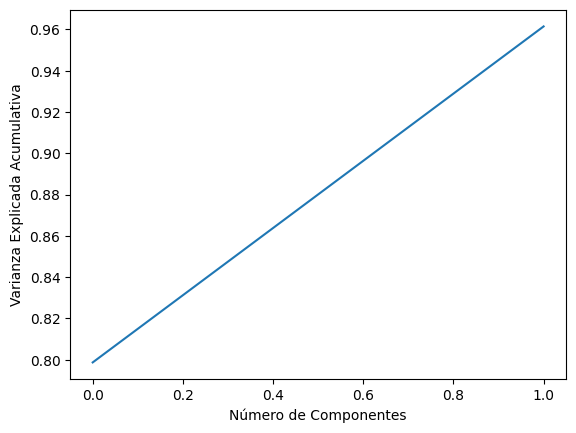

In [ ]:
# Graficar la varianza explicada acumulativa
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()

In [ ]:
df_filtered[["Weekly_Sales", "Unemployment", "Fuel_Price", "CPI", "PC1", "PC2"]].corr()

,Weekly_Sales,Unemployment,Fuel_Price,CPI,PC1,PC2
Weekly_Sales,1.000000,-0.071126,0.043472,0.104756,8.325840e-02,-2.932657e-02
Unemployment,-0.071126,1.000000,-0.513944,-0.813471,-8.713106e-01,4.604778e-01
Fuel_Price,0.043472,-0.513944,1.000000,0.755259,8.419510e-01,5.241606e-01
CPI,0.104756,-0.813471,0.755259,1.000000,9.632691e-01,-4.162737e-02
PC1,0.083258,-0.871311,0.841951,0.963269,1.000000e+00,3.789041e-16
PC2,-0.029327,0.460478,0.524161,-0.041627,3.789041e-16,1.000000e+00


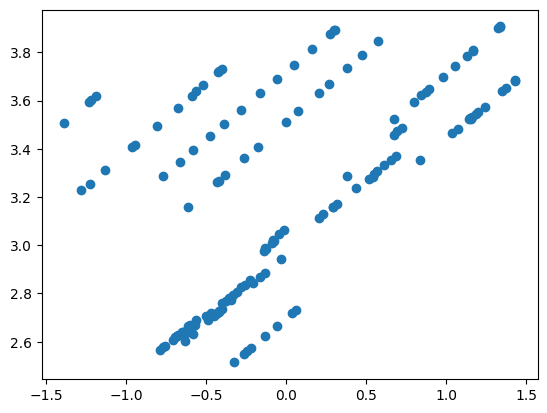

In [ ]:
plt.scatter(df_filtered["PC2"], df_filtered["Fuel_Price"])
plt.show()

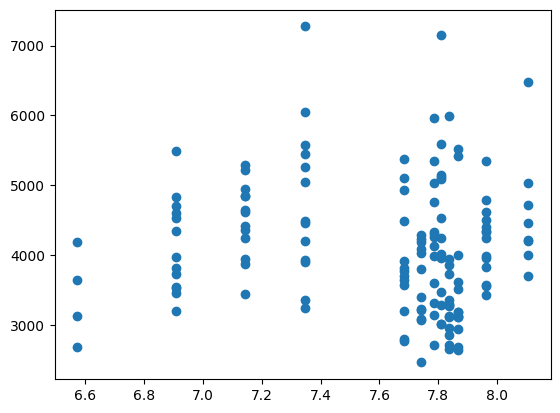

In [ ]:
plt.scatter(df_filtered["Unemployment"], df_filtered["Weekly_Sales"])
plt.show()

In [ ]:
plt.scatter(df_filtered["PC2"], df_filtered["Weekly_Sales"])
plt.show()